## Problem 2: Fibonacci Sequence

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [1]:
import time
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

In [2]:
'''
Get the nth Fibonacci number with recursion.
The 0th Fibonacci number is 0, the 1st Fibonacci number is 1.
The nth Fibonacci number is the n-1th Fibonacci number + the n-2th Fibonacci number.

eg.
>>> fibonacci(7)
>>> 7
'''

def fibonacci(position: int) -> int:
    '''
    --- Function Description --------------------------------------------------------------------------------------------------
        Get the nth Fibonacci number with recursion.
        The 0th Fibonacci number is 0, the 1st Fibonacci number is 1.
        The nth Fibonacci number is the n-1th Fibonacci number + the n-2th Fibonacci number.
    ---------------------------------------------------------------------------------------------------------------------------
    
    --- Function Inputs -------------------------------------------------------------------------------------------------------
        : int : position : The position in the Fibonacci sequence.
    ---------------------------------------------------------------------------------------------------------------------------
    
    --- Function Outputs ------------------------------------------------------------------------------------------------------
        : int : position : The number in the Fibonacci sequence.
    ---------------------------------------------------------------------------------------------------------------------------
    
    --- Function Examples -----------------------------------------------------------------------------------------------------
        >>> fibonacci(7)
        >>> 7
    ---------------------------------------------------------------------------------------------------------------------------
    '''
    
    # Check types of function inputs:
    if not isinstance(position, int): raise ValueError('Please enter an integer >= 0 for the position argument.')
    if position < 0: raise ValueError('Please enter an integer >= 0 for the position argument.')
    
    # Check if we are looking for the 0th or 1st Fibonacci number.
    # If so, return the value
    if position <= 1:
        return position
    # Otherwise, calculate the value using the n-1 and n-2 Fibonacci numbers
    else:
        return fibonacci(position-1) + fibonacci(position-2)

In [3]:
# Ask for the first 12 fibonacci numbers.
# The sequence on Prject Euler omits the 0th and 1st fibonacci numbers.
fibonacci_sequence = []
for i in range(12):
    fibonacci_sequence.append(fibonacci(i))

In [4]:
print(fibonacci_sequence[2:])

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


In [5]:
# We want to consider fibonacci numbers below 4,000,000
max_fibonacci = 4000000

# Variables to store results
# Sum of the even fibonacci numbers
even_sum = 0
# The fibonacci number calculated
result = 0
# The position of the fibonacci number
n=0

# Continue calculating the fibonacci numbers until we reach the max
while result < max_fibonacci:
    # If the fibonacci number is even, add it to our even sum
    if result % 2 == 0: even_sum += result
    # Move to the next fibonacci number
    n+=1
    result = fibonacci(n)
# Print result
print(even_sum)

4613732


In [6]:
# List of the max values we want to search up to.
max_fibonaccis = []

# Search in the range of X to Y
for e in range(2,7):
    for n in range(1,10):
        max_fibonaccis.append(n*10**e)

# Store calculation times for plotting
computation_times = []
# Perform same loop as above for each max search value
for max_fibonacci in max_fibonaccis:
    # Get the time at the start of the calculation
    start_time = time.time()
    
    # Calculation
    even_sum = 0
    result = 0
    n=0
    while result < max_fibonacci:
        if result % 2 == 0: even_sum += result
        n+=1
        result = fibonacci(n)
    
    # Get the time at the end of the calculation
    end_time = time.time()
    # Print result and timing info
    print(f"Sum of all the fibonacci numbers less than {max_fibonacci:,} = {even_sum}, computed in {end_time - start_time:.6f}s")
    # Record computation time
    computation_times.append(end_time - start_time)

Sum of all the fibonacci numbers less than 100 = 44, computed in 0.000496s
Sum of all the fibonacci numbers less than 200 = 188, computed in 0.000496s
Sum of all the fibonacci numbers less than 300 = 188, computed in 0.000992s
Sum of all the fibonacci numbers less than 400 = 188, computed in 0.000674s
Sum of all the fibonacci numbers less than 500 = 188, computed in 0.000813s
Sum of all the fibonacci numbers less than 600 = 188, computed in 0.000496s
Sum of all the fibonacci numbers less than 700 = 798, computed in 0.000992s
Sum of all the fibonacci numbers less than 800 = 798, computed in 0.000992s
Sum of all the fibonacci numbers less than 900 = 798, computed in 0.000992s
Sum of all the fibonacci numbers less than 1,000 = 798, computed in 0.001488s
Sum of all the fibonacci numbers less than 2,000 = 798, computed in 0.002976s
Sum of all the fibonacci numbers less than 3,000 = 3382, computed in 0.004960s
Sum of all the fibonacci numbers less than 4,000 = 3382, computed in 0.004464s
Sum

<Figure size 432x288 with 0 Axes>

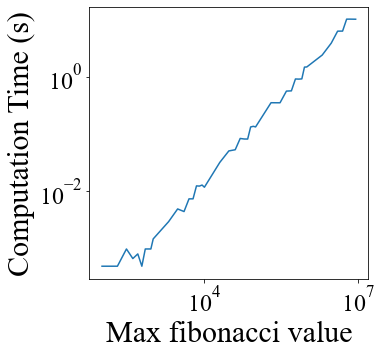

In [7]:
# Create plot of the computation time vs the max fibonacci value.
# Plotted on a log log scale, the line appears straight,
# making the computation O(N)

plt.clf()
fig = plt.figure(figsize=(5,5))

# Plot all results
plt.plot(max_fibonaccis, computation_times)

plt.yscale('log')
plt.xscale('log')

plt.ylabel('Computation Time (s)', fontsize=30)
plt.xlabel('Max fibonacci value', fontsize=30)

plt.tick_params(labelsize=24)

plt.show()

Search is O(N) but can be improved, we do not need to recalculate all the n-1 to 0 fibonacci numbers each time if we calculate the even_sum inside a loop.

In [8]:
'''
Get the even_sum of all fibonacci numbers below max_fibonacci without recursion.
Starts with the 0th and 1st Fibonacci numbers, then continues calculating Fibonacci numbers until reaching the max number.
When an even Fibonacci number is found, add it to the sum.

eg.
>>> even_sum_fibonacci(1000)
>>> 798
'''

def even_sum_fibonacci(max_fibonacci : int) -> int:
    '''
    --- Function Description --------------------------------------------------------------------------------------------------
        Get the even_sum of all fibonacci numbers below max_fibonacci without recursion.
        Starts with the 0th and 1st Fibonacci numbers, then continues calculating Fibonacci numbers until reaching the max number.
        When an even Fibonacci number is found, add it to the sum.
    ---------------------------------------------------------------------------------------------------------------------------
    
    --- Function Inputs -------------------------------------------------------------------------------------------------------
        : int : max_fibonacci : Consider all Fibonacci numbers below this value.
    ---------------------------------------------------------------------------------------------------------------------------
    
    --- Function Outputs ------------------------------------------------------------------------------------------------------
        : int : even_sum : The sum of all even Fibonacci numbers below the specified value.
    ---------------------------------------------------------------------------------------------------------------------------
    
    --- Function Examples -----------------------------------------------------------------------------------------------------
        >>> even_sum_fibonacci(1000)
        >>> 798
    ---------------------------------------------------------------------------------------------------------------------------
    '''
    if not isinstance(max_fibonacci, int): raise ValueError('Please enter an integer >= 0 for the max_fibonacci argument.')
    if max_fibonacci < 0: raise ValueError('Please enter an integer >= 0 for the max_fibonacci argument.')
    
    # Last Fibonacci number
    f0=0
    # Current Fibonacci number
    f1=1
    
    # Sum of even Fibonacci numbers
    even_sum=0
    
    # Sum the even Fibonacci numbers while they are less than the specified limit.
    while f0 < max_fibonacci:
        if f0 % 2 == 0: even_sum += f0
        
        # Update Fibonacci numbers
        f0, f1 = f1, f0+f1
        
    return even_sum

In [9]:
# List of the max values we want to search up to.
max_fibonaccis = [4000000]

# Search in the range of X to Y
for e in range(150,151):
    for n in range(1,10):
        max_fibonaccis.append(n*10**e)

# Store calculation times for plotting
computation_times = []
# Perform same loop as above for each max search value
for max_fibonacci in max_fibonaccis:
    # Get the time at the start of the calculation
    start_time = time.time()
    
    # Calculation
    even_sum = even_sum_fibonacci(max_fibonacci)
    
    # Get the time at the end of the calculation
    end_time = time.time()
    # Print result and timing info
    print(f"Sum of all the fibonacci numbers less than {max_fibonacci:,} = {even_sum}, computed in {end_time - start_time:.6f}s")
    # Record computation time
    computation_times.append(end_time - start_time)

Sum of all the fibonacci numbers less than 4,000,000 = 4613732, computed in 0.000000s
Sum of all the fibonacci numbers less than 1,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000 = 408882329188750643372675526899441637264503371614158050351909013551698742621286710639635812854617918591128221049658513384246553048989803428611920580240, computed in 0.000000s
Sum of all the fibonacci numbers less than 2,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000 = 1732053341241994164201459569694911230605823142077396363903382351888201153574051864010755210977365488410882385722003180975265336852771092195136066611280, computed in 0.000000s
Sum of all the fibonacci numbers less than 3,000,000,000,000,000,000,00

<Figure size 432x288 with 0 Axes>

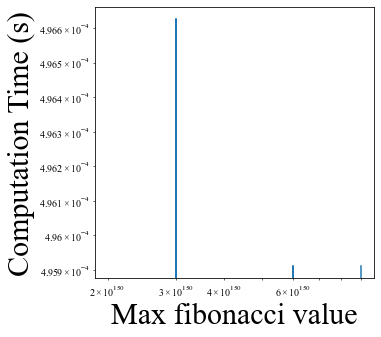

In [10]:
# Create plot of the computation time vs the max search integer.

plt.clf()
fig = plt.figure(figsize=(5,5))

# Plot all results above n=200 since the time recorded is 0.000000
plt.plot(max_fibonaccis[2:], computation_times[2:])

plt.yscale('log')
plt.xscale('log')

plt.ylabel('Computation Time (s)', fontsize=30)
plt.xlabel('Max fibonacci value', fontsize=30)

plt.tick_params(labelsize=24)

plt.show()

Now the calculation time is negligible for extremely large max values.

### Problem 2 Solution: 

The sum of the even-valued terms in the Fibonacci sequence whose values do not exceed four million = 4,613,732.